In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import GridspecLayout, Button, Layout
import math, queue, threading, time
%matplotlib notebook

class lunar_launder: # 物理動作をつかさどるクラス
    def __init__(self, pos):
        self.position = pos          # 位置
        self.velocity = np.zeros(3)  # xyz速度
        #self.is_jetting = False      # Jet推進中か否か
    def update(self, acc):
        self.position = self.position + self.velocity # 位置を更新
        self.velocity = self.velocity + acc           # XYZ速度を更新

In [21]:
class vis_in_matplot: # matplotlibでの表示をつかさどるクラス
    def __init__(self):
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.ax.set_xlim([-15,15])
        self.ax.set_ylim([-15,15])
        self.ax.set_zlim([0, 30])
        self.ax.set_xlabel('X-axis',fontsize='large')
        self.ax.set_ylabel('Y-axis',fontsize='large')
        self.ax.set_zlabel('Z-axis',fontsize='large')
        self.q = self.ax.quiver(0, 0, 0, 0, 0, 1, alpha=0.1)
    def update(self, pos):
        X, Y, Z, U, V, W = np.concatenate([pos, [0, 0, 1]])
        self.q = self.ax.quiver(X, Y, Z, U, V, W, alpha=0.1)

In [30]:
label = [["","⬆️",""],["⬅️","🔥","➡️"],["","⬇️",""]]
def create_button(description, style):
    return Button( description = description, button_style = style, 
                   layout=Layout(height='auto', width='auto') )
def button_event_handler(btn):
    for i in range(int(0.5/time_step_in_seconds)):     
        control_queue.put(np.array(btn.value)) #「与える力」キューに追加
def make_buttons(grid):
    grid = GridspecLayout(3, 3)
    for i, y in enumerate([0.02, 0, -0.02]):
        for j, x in enumerate([-0.02, 0, 0.02]):
            grid[i,j] = create_button(label[i][j],'warning')
            if i==1 and j==1:
                grid[i,j].value = np.array([0,0,0.02])
            elif (i+j)%2==0:
                grid[i,j].value = np.array([0,0,0])
            else:
                grid[i,j].value = np.array([x,y,0])
            grid[i,j].on_click(button_event_handler)
    return grid

<IPython.core.display.Javascript object>


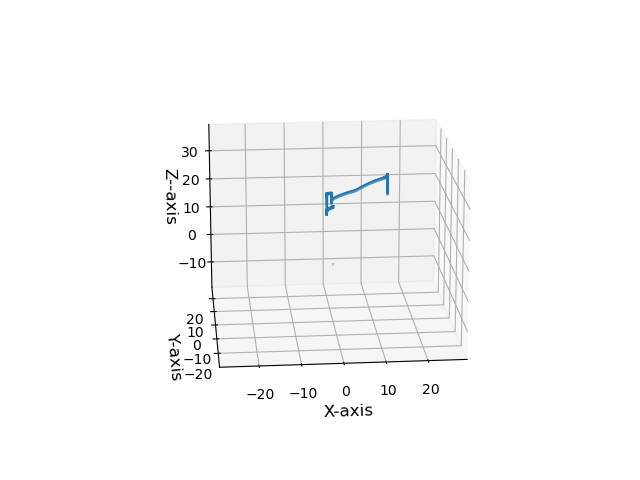

GridspecLayout(children=(Button(button_style='warning', layout=Layout(grid_area='widget001', height='auto', wi…

In [31]:
def sim(my_lunar_launder, control_queue, my_vis_in_matplot):
    for i in range(n):
        acc = np.zeros(3)
        if not control_queue.empty():
            acc = (acc+control_queue.get())*time_step_in_seconds
        my_lunar_launder.update(acc+g)
        my_vis_in_matplot.update(my_lunar_launder.position)
        time.sleep(time_step_in_seconds)
control_queue = queue.Queue() # 動作命令=与える力キュー
g = np.array([0,0,-9.8*0.00001])
time_step_in_seconds=0.05; time_limit_in_seconds=100.0
n = int(time_limit_in_seconds/time_step_in_seconds)
my_lunar_launder = lunar_launder(np.array([0,0,20]))
my_vis_in_matplot = vis_in_matplot()
thread_phys = threading.Thread(target=sim,
    args=(my_lunar_launder, control_queue, my_vis_in_matplot,))
thread_phys.start()
grid = None; make_buttons(grid)